In [1]:
import seaborn as sb
from scipy import stats
import math
import statistics as stat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

принимаем


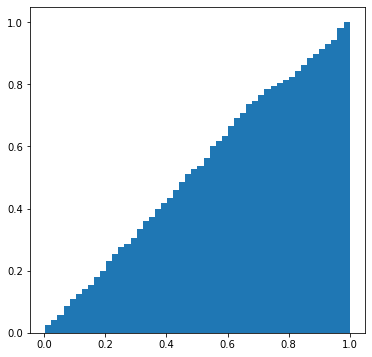

In [3]:
#1
N = 1000
n= 1000
alpha=0.05
T = np.zeros(N)
samples = stats.norm.rvs(loc=0,scale=1,size=n) #проверяем
T_0 = stats.cramervonmises(samples, 'norm')


k=0
for i in range(N): #p-value через монтекарло
    montecarlo = stats.norm.rvs(size=n)
    T[i] = stats.cramervonmises(montecarlo,'norm').statistic
    if (T[i]>T_0.statistic):
        k+=1
p_value = k/N
if p_value > alpha:
    print('принимаем')
else:
    print('отвергаем')


p_value0 = np.zeros(N)
for i in range(N):
    k=0
    samples = stats.norm.rvs(size=n)
    T_00 = stats.cramervonmises(samples, 'norm')
    for j in range(N):
        if (T[j]>T_00.statistic):
            k+=1
    p_value0[i]=k/N
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.hist(p_value0,bins=50,density=True,cumulative=True)
plt.show()

In [4]:
def anderson(sample):
    n = len(sample)
    sample = np.sort(sample)
    T = -n
    for i in range(n):
        T -= (2*(i+1)-1)/n * (stats.norm.logcdf(sample[i])+stats.norm.logsf(sample[n-i-1]))
    return T

принимаем


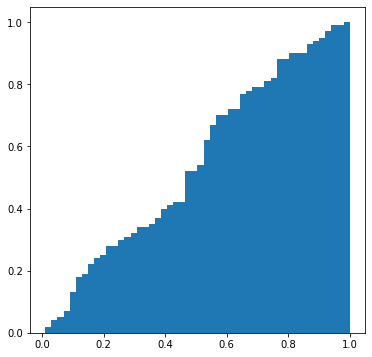

In [5]:
N = 100
n = 1000
alpha = 0.05
T = np.zeros(N)
samples = stats.norm.rvs(loc=0,scale=1,size=n) #проверяем
T_0 = anderson(samples)


k=0
for i in range(N): #p-value через монтекарло
    montecarlo = stats.norm.rvs(size=n)
    T[i] = anderson(montecarlo)
    if (T[i]>T_0):
        k+=1
p_value = k/N

if p_value >= alpha:
    print('принимаем')
else:
    print('отвергаем')


p_value0 = np.zeros(N)
for i in range(N):
    k=0
    samples = stats.norm.rvs(size=n)
    T_00 = anderson(samples)
    for j in range(N):
        if (T[j]>T_00):
            k+=1
    p_value0[i]=k/N
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.hist(p_value0,bins=50,density=True,cumulative=True)
plt.show()

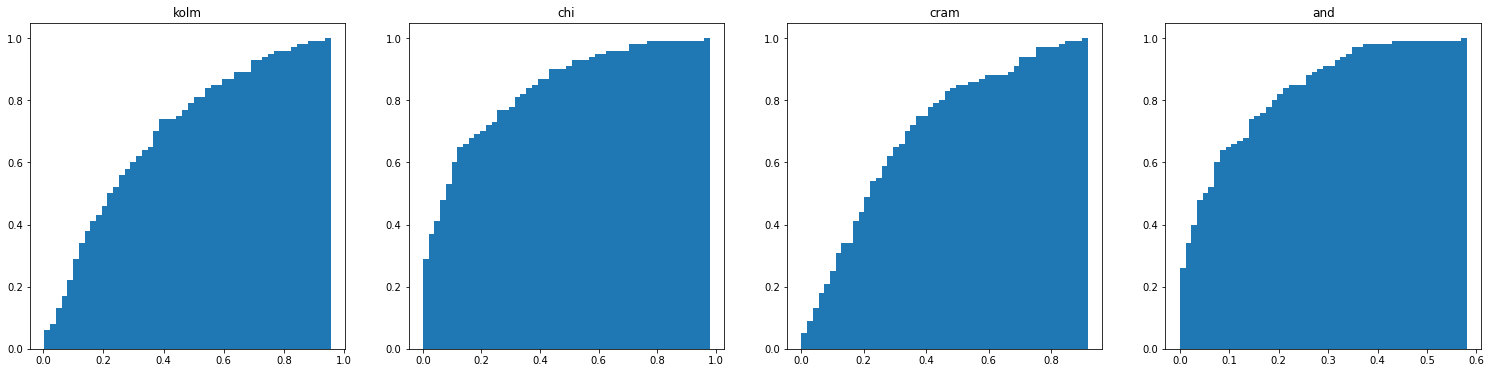

In [14]:
#2
#a
n = 200
N = 100
p = 0.9
alpha = 0.05

p_k = np.zeros(N)
p_chi = np.zeros(N)
p_and = np.zeros(N)
p_cram = np.zeros(N)

k = round(np.log(n)/np.log(2)) #для хи квадрата
t = 0
delta = np.zeros(k)
for i in range(k):
    t += 1./k
    delta[i] = stats.norm.ppf(t)
    
for i in range(N):
    samples=np.zeros(n)
    for j in range(n):
        y = stats.bernoulli.rvs(p)
        if y == 1:
            samples[j] = stats.norm.rvs(loc=0,scale=1,size=1)
        else:
            samples[j] = stats.norm.rvs(loc=0,scale=3,size=1)
    samples=np.sort(samples)
    
    l = 0
    j = 0
    C = np.zeros(k)
    while l < n:
        if j < k-1:
            if samples[l] <= delta[j]:
                C[j] += 1
            else:
                j += 1
        l += 1
    C[k-1] = n - np.sum(C)
    
    p_k[i] = stats.kstest(samples,stats.norm.cdf).pvalue
    p_chi[i] = stats.chisquare(C).pvalue
    p_cram[i] =stats.cramervonmises(samples, 'norm').pvalue
    
    r=0
    T_00 = anderson(samples)
    montecarlo = stats.norm.rvs(size=n)
    T[i] = anderson(montecarlo)
    for j in range(N):
        if (T[j]>T_00):
            r+=1
    p_and[i]=r/N
fig, ax = plt.subplots(1,4,figsize=(26,6))
ax[0].set_title('kolm')
ax[1].set_title('chi')
ax[2].set_title('cram')
ax[3].set_title('and')

ax[0].hist(p_k,bins=50,density=True,cumulative=True)
ax[1].hist(p_chi,bins=50,density=True,cumulative=True)
ax[2].hist(p_cram,bins=50,density=True,cumulative=True)
ax[3].hist(p_and,bins=50,density=True,cumulative=True)
plt.show()

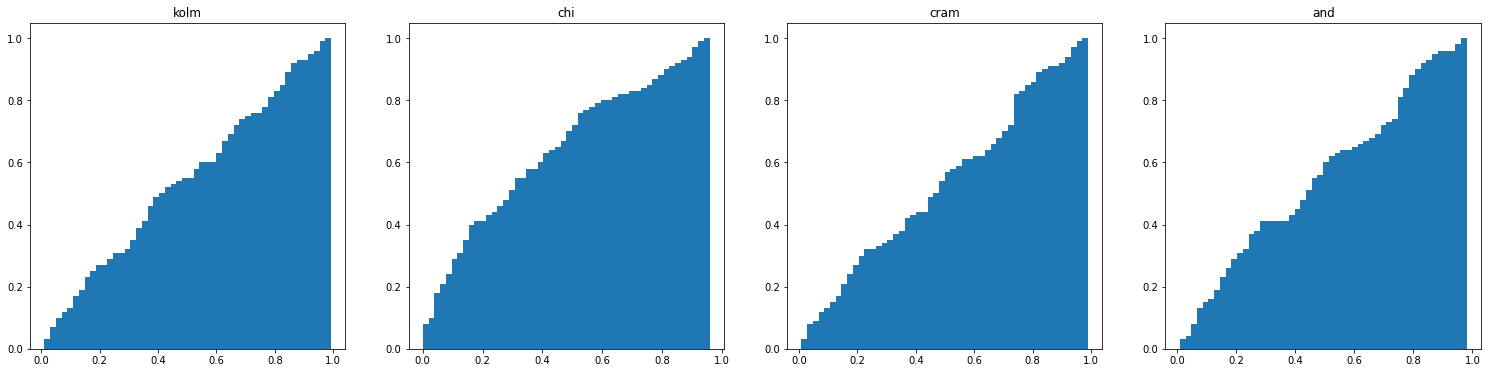

In [15]:
#2
#b
n = 200
N = 100
mu = 0.1
alpha = 0.05


p_k = np.zeros(N)
p_chi = np.zeros(N)
p_and = np.zeros(N)
p_cram = np.zeros(N)

k = round(np.log(n)/np.log(2)) #для хи квадрата
t = 0
delta = np.zeros(k)
for i in range(k):
    t += 1./k
    delta[i] = stats.norm.ppf(t)
    
for i in range(N):
    samples=np.zeros(n)
    for j in range(n):
        y = stats.bernoulli.rvs(0.5)
        if y == 1:
            samples[j] = stats.norm.rvs(loc=mu,scale=1,size=1)
        else:
            samples[j] = stats.norm.rvs(loc=-mu,scale=1,size=1)
    samples=np.sort(samples)
    
    l = 0
    j = 0
    C = np.zeros(k)
    while l < n:
        if j < k-1:
            if samples[l] <= delta[j]:
                C[j] += 1
            else:
                j += 1
        l += 1
    C[k-1] = n - np.sum(C)
    
    p_k[i] = stats.kstest(samples,stats.norm.cdf).pvalue
    p_chi[i] = stats.chisquare(C).pvalue
    p_cram[i] =stats.cramervonmises(samples, 'norm').pvalue
    
    r=0
    T_00 = anderson(samples)
    montecarlo = stats.norm.rvs(size=n)
    T[i] = anderson(montecarlo)
    for j in range(N):
        if (T[j]>T_00):
            r+=1
    p_and[i]=r/N
fig, ax = plt.subplots(1,4,figsize=(26,6))
ax[0].set_title('kolm')
ax[1].set_title('chi')
ax[2].set_title('cram')
ax[3].set_title('and')

ax[0].hist(p_k,bins=50,density=True,cumulative=True)
ax[1].hist(p_chi,bins=50,density=True,cumulative=True)
ax[2].hist(p_cram,bins=50,density=True,cumulative=True)
ax[3].hist(p_and,bins=50,density=True,cumulative=True)
plt.show()